# Managing images 

This notebook allows me to get a better understanding of the images and how they should be resized. It is clear that the images are all complelety different physical sizes depending on publication and so need a layout detector that is flexible enough to handle that.

In [1]:
from pdf2image import convert_from_path
import os
import fitz  # PyMuPDF
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


def get_pdf_image_data(pdf_path):
    # Initialize lists to store data for each page
    page_data = {
        "Page": [],
        "Width (pixels)": [],
        "Height (pixels)": [],
        "Width (inches)": [],
        "Height (inches)": [],
        "Width (mm)": [],
        "Height (mm)": [],
        "DPI (x)": [],
        "DPI (y)": []
    }
    
    # Open the PDF
    doc = fitz.open(pdf_path)
    
    for page_number in range(len(doc)):
        page = doc.load_page(page_number)
        
        # Get physical dimensions of the page in points
        rect = page.rect  # Page rectangle in points
        
        # Convert page dimensions to inches and mm
        width_in_inches = rect.width / 72
        height_in_inches = rect.height / 72
        width_in_mm = rect.width * 25.4 / 72
        height_in_mm = rect.height * 25.4 / 72
        
        # Extract the images on the page
        images = page.get_images(full=True)
        
        # If there are images on the page, calculate the DPI for the first one
        if images:
            img = images[0]  # Assuming we take the first image for simplicity
            xref = img[0]
            base_image = doc.extract_image(xref)
            width_pixels = base_image["width"]
            height_pixels = base_image["height"]

            # Calculate DPI (DPI = pixels / inches)
            dpi_x = width_pixels / width_in_inches if width_in_inches != 0 else None
            dpi_y = height_pixels / height_in_inches if height_in_inches != 0 else None
        else:
            # If no image, set DPI and pixel dimensions to None
            width_pixels = None
            height_pixels = None
            dpi_x = None
            dpi_y = None

        # Append the data to the lists
        page_data["Page"].append(page_number + 1)
        page_data["Width (pixels)"].append(width_pixels)
        page_data["Height (pixels)"].append(height_pixels)
        page_data["Width (inches)"].append(width_in_inches)
        page_data["Height (inches)"].append(height_in_inches)
        page_data["Width (mm)"].append(width_in_mm)
        page_data["Height (mm)"].append(height_in_mm)
        page_data["DPI (x)"].append(dpi_x)
        page_data["DPI (y)"].append(dpi_y)
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(page_data)
    
    return df

def convert_pdf_to_image(pdf_path, output_folder='output_images', dpi=300, format='PNG'):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Convert PDF to images
    images = convert_from_path(pdf_path, dpi=dpi)

    # Determine file extension based on format
    if format.upper() == 'PNG':
        file_extension = 'png'
    elif format.upper() == 'JPEG':
        file_extension = 'jpg'
    else:
        raise ValueError("Unsupported format. Use 'PNG' or 'JPEG'.")

    # Save each page as an image file
    for i, image in enumerate(images):
        output_file = os.path.join(output_folder, f'page_{i + 1}.{file_extension}')
        image.save(output_file, format)
        print(f'Saved page {i + 1} as {output_file}')


# Example usage



In [14]:

all_example_pages = []

for issue in os.listdir('data/example_pdf'):


    _temp = get_pdf_image_data(os.path.join('data/example_pdf',issue))
    _temp['file'] = issue
    all_example_pages.append(_temp)
    print(f'Issue: {issue} completed')


all_example_pages = pd.concat(all_example_pages, ignore_index=True)


Issue: EWJ-1862-05-01.pdf completed
Issue: CLD-1850-06-08.pdf completed
Issue: NSS-1844-06-01.pdf completed
Issue: TTW-1868-05-23.pdf completed
Issue: MRP-1806-08-02.pdf completed
Issue: TEC-1884-05-15.pdf completed


## Comparing newspapers

There is an absolutely massive difference in the physical size of the papers

<Axes: xlabel='Width (mm)', ylabel='Count'>

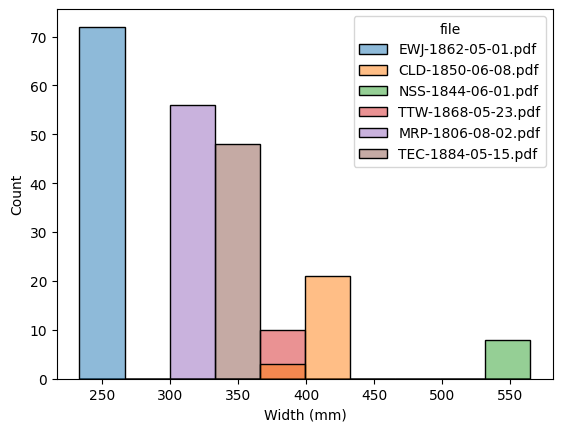

In [19]:
sns.histplot(data = all_example_pages, x= 'Width (mm)', hue = 'file')

<Axes: xlabel='Height (mm)', ylabel='Count'>

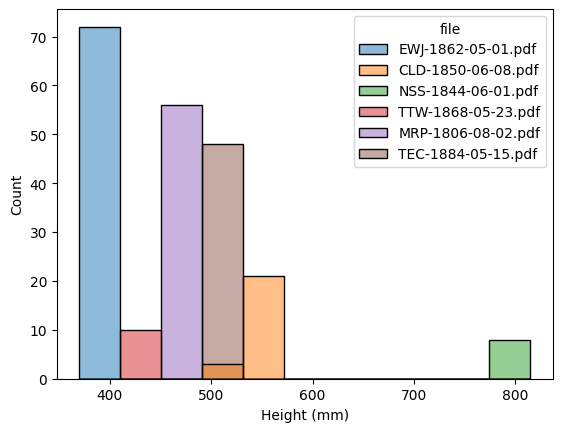

In [20]:
sns.histplot(data = all_example_pages, x= 'Height (mm)', hue = 'file')

<Axes: xlabel='Height (mm)', ylabel='Width (mm)'>

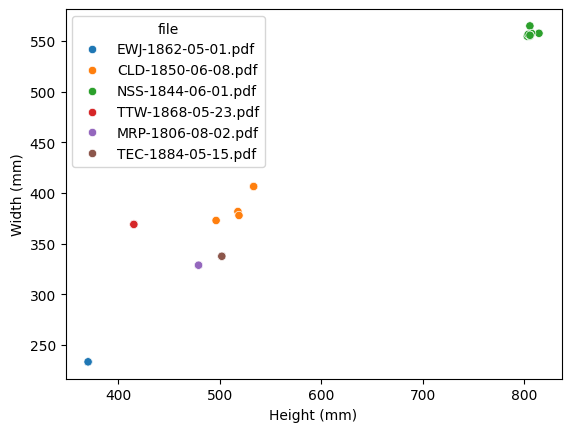

In [21]:
sns.scatterplot(data = all_example_pages, x= 'Height (mm)', y = 'Width (mm)', hue = 'file')

In [2]:


# Example usage
convert_pdf_to_image('data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_300', dpi=300)
convert_pdf_to_image('data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_200', dpi=200)
convert_pdf_to_image('data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_72', dpi=72)


Saved page 1 as data/converted/CLD-1850-06-08_300/page_1.png
Saved page 2 as data/converted/CLD-1850-06-08_300/page_2.png
Saved page 3 as data/converted/CLD-1850-06-08_300/page_3.png
Saved page 4 as data/converted/CLD-1850-06-08_300/page_4.png
Saved page 5 as data/converted/CLD-1850-06-08_300/page_5.png
Saved page 6 as data/converted/CLD-1850-06-08_300/page_6.png
Saved page 7 as data/converted/CLD-1850-06-08_300/page_7.png
Saved page 8 as data/converted/CLD-1850-06-08_300/page_8.png
Saved page 9 as data/converted/CLD-1850-06-08_300/page_9.png
Saved page 10 as data/converted/CLD-1850-06-08_300/page_10.png
Saved page 11 as data/converted/CLD-1850-06-08_300/page_11.png
Saved page 12 as data/converted/CLD-1850-06-08_300/page_12.png
Saved page 13 as data/converted/CLD-1850-06-08_300/page_13.png
Saved page 14 as data/converted/CLD-1850-06-08_300/page_14.png
Saved page 15 as data/converted/CLD-1850-06-08_300/page_15.png
Saved page 16 as data/converted/CLD-1850-06-08_300/page_16.png
Saved page

In [5]:
convert_pdf_to_image('data/example_pdf/NSS-1844-06-01.pdf', output_folder='data/converted/NSS-1844-06-01_300', dpi=300)
convert_pdf_to_image('data/example_pdf/NSS-1844-06-01.pdf', output_folder='data/converted/NSS-1844-06-01_200', dpi=200)
convert_pdf_to_image('data/example_pdf/NSS-1844-06-01.pdf', output_folder='data/converted/NSS-1844-06-01_72', dpi=72)
convert_pdf_to_image('data/example_pdf/NSS-1844-06-01.pdf', output_folder='data/converted/NSS-1844-06-01_20', dpi=20)

Saved page 1 as data/converted/NSS-1844-06-01_300/page_1.png
Saved page 2 as data/converted/NSS-1844-06-01_300/page_2.png
Saved page 3 as data/converted/NSS-1844-06-01_300/page_3.png
Saved page 4 as data/converted/NSS-1844-06-01_300/page_4.png
Saved page 5 as data/converted/NSS-1844-06-01_300/page_5.png
Saved page 6 as data/converted/NSS-1844-06-01_300/page_6.png
Saved page 7 as data/converted/NSS-1844-06-01_300/page_7.png
Saved page 8 as data/converted/NSS-1844-06-01_300/page_8.png
All pages from data/example_pdf/NSS-1844-06-01.pdf have been converted to PNG.
Saved page 1 as data/converted/NSS-1844-06-01_200/page_1.png
Saved page 2 as data/converted/NSS-1844-06-01_200/page_2.png
Saved page 3 as data/converted/NSS-1844-06-01_200/page_3.png
Saved page 4 as data/converted/NSS-1844-06-01_200/page_4.png
Saved page 5 as data/converted/NSS-1844-06-01_200/page_5.png
Saved page 6 as data/converted/NSS-1844-06-01_200/page_6.png
Saved page 7 as data/converted/NSS-1844-06-01_200/page_7.png
Saved 

In [9]:
convert_pdf_to_image('data/example_pdf/NSS-1844-06-01.pdf', output_folder='data/converted/NSS-1844-06-01_100', dpi=100)

Saved page 1 as data/converted/NSS-1844-06-01_100/page_1.png
Saved page 2 as data/converted/NSS-1844-06-01_100/page_2.png
Saved page 3 as data/converted/NSS-1844-06-01_100/page_3.png
Saved page 4 as data/converted/NSS-1844-06-01_100/page_4.png
Saved page 5 as data/converted/NSS-1844-06-01_100/page_5.png
Saved page 6 as data/converted/NSS-1844-06-01_100/page_6.png
Saved page 7 as data/converted/NSS-1844-06-01_100/page_7.png
Saved page 8 as data/converted/NSS-1844-06-01_100/page_8.png
All pages from data/example_pdf/NSS-1844-06-01.pdf have been converted to PNG.


In [5]:
convert_pdf_to_image(pdf_path='data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_300_jpg', dpi=300, format='JPEG')
convert_pdf_to_image('data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_200_jpg', dpi=200, format='JPEG')
convert_pdf_to_image('data/example_pdf/CLD-1850-06-08.pdf', output_folder='data/converted/CLD-1850-06-08_72_jpg', dpi=72, format='JPEG')

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file '/data/example_pdf/CLD-1850-06-08.pdf': No such file or directory.
